In [ ]:
import pandas as pd
import datetime

# df is short for dataframe (basically an excel sheet)
def parse(t):
    ret = []
    for ts in t:
        try:
            string = str(ts)
            tsdt = datetime.date(int(string[:4]), int(string[4:6]), int(string[6:]))
        except TypeError:
            tsdt = datetime.date(1900,1,1)
        ret.append(tsdt)
    return ret

df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1968.csv", index_col=None,
                         header=0,
                         parse_dates=[5],
                         encoding = "ISO-8859-1",
                         date_parser=lambda t:parse(t))

df1 = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1969.csv", index_col=None,
                         header=0,
                         parse_dates=[5],
                         encoding = "ISO-8859-1",
                         date_parser=lambda t:parse(t))
final_df = pd.concat([df,df1])

# Think of a way to automate this. We can check the github 
# https://github.com/JeffSackmann/tennis_atp
# and see that there are matches from the years 1968 to 2021
# Instead of downloading 40 years of matches and copy pasting, this is a clear example of how coding can help us
# Hint: write a for loop
display(df)
display(df1)
display(final_df)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,1968-07-08,270,202866,NaN,NaN,Doug Smith,U,NaN,AUS,NaN,110196,NaN,NaN,Peter Ledbetter,U,NaN,UNK,NaN,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,1968-07-08,271,126914,NaN,NaN,Louis Pretorius,R,NaN,RSA,NaN,209536,NaN,NaN,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,1968-07-08,272,209523,NaN,NaN,Cecil Pedlow,U,NaN,IRL,NaN,209535,NaN,NaN,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,1968-07-08,273,100084,NaN,NaN,Tom Okker,R,178.0,NED,24.375086,209534,NaN,NaN,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,1968-07-08,274,100132,NaN,NaN,Armistead Neely,R,NaN,USA,21.305955,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1968-D047,Davis Cup EUR QF: URS vs YUG,NaN,4,D,1968-05-24,5,109822,NaN,NaN,Thomas Lejus,R,NaN,RUS,26.737851,100039,NaN,NaN,Boro Jovanovic,R,NaN,CRO,28.591376,7-5 4-6 6-3 6-2,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,1968-D048,Davis Cup EUR R1: SWE vs RHO,Hard,4,D,1968-05-05,1,100098,NaN,NaN,Ove Nils Bengtson,R,196.0,SWE,23.082820,111115,NaN,NaN,Adrian Bey,U,NaN,RHO,29.971253,6-3 6-2 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,1968-D048,Davis Cup EUR R1: SWE vs RHO,Hard,4,D,1968-05-05,2,110947,NaN,NaN,Frank Saloman,U,NaN,RHO,25.401780,110181,NaN,NaN,Hans Nerell,R,NaN,SWE,NaN,2-6 6-4 7-5 1-6 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1968-D048,Davis Cup EUR R1: SWE vs RHO,Hard,4,D,1968-05-05,4,100098,NaN,NaN,Ove Nils Bengtson,R,196.0,SWE,23.082820,110947,NaN,NaN,Frank Saloman,U,NaN,RHO,25.401780,6-1 6-3 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1969-2029,Dublin,Grass,32,A,1969-07-07,270,100011,NaN,NaN,Torben Ulrich,L,NaN,DEN,36.755647,207077,NaN,NaN,Desmond Early,NaN,NaN,IRL,NaN,6-0 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1969-2029,Dublin,Grass,32,A,1969-07-07,271,100058,NaN,NaN,Roger Taylor,L,NaN,GBR,27.728953,209525,NaN,NaN,Dennis Foley,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1969-2029,Dublin,Grass,32,A,1969-07-07,272,100114,NaN,NaN,Ray Ruffels,R,NaN,AUS,23.290897,110196,NaN,NaN,Peter Ledbetter,U,NaN,UNK,NaN,6-0 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1969-2029,Dublin,Grass,32,A,1969-07-07,273,125672,NaN,NaN,Kenneth Reid,U,NaN,IRL,NaN,209594,NaN,NaN,P Coyle,U,NaN,IRL,NaN,6-3 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1969-2029,Dublin,Grass,32,A,1969-07-07,274,100037,NaN,NaN,Nikola Pilic,L,NaN,CRO,29.861739,209593,NaN,NaN,G Doughty,U,NaN,IRL,NaN,6-3 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,1969-D049,Davis Cup EUR F: ROU vs URS,Clay,4,D,1969-07-18,5,100159,NaN,NaN,Vladimir Korotkov,R,NaN,RUS,21.234771,109751,NaN,NaN,Sever Dron,R,NaN,ROU,NaN,6-1 6-4 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,1,100074,NaN,NaN,Arthur Ashe,R,185.0,USA,26.195756,100119,NaN,NaN,Ilie Nastase,R,183.0,ROU,23.170431,6-2 15-13 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,2,100126,NaN,NaN,Stan Smith,R,193.0,USA,22.765229,100035,NaN,NaN,Ion Tiriac,R,NaN,ROU,30.365503,6-8 6-3 5-7 6-4 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,4,100126,NaN,NaN,Stan Smith,R,193.0,USA,22.765229,100119,NaN,NaN,Ilie Nastase,R,183.0,ROU,23.170431,4-6 4-6 6-4 6-1 11-9,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,1968-07-08,270,202866,NaN,NaN,Doug Smith,U,NaN,AUS,NaN,110196,NaN,NaN,Peter Ledbetter,U,NaN,UNK,NaN,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,1968-07-08,271,126914,NaN,NaN,Louis Pretorius,R,NaN,RSA,NaN,209536,NaN,NaN,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,1968-07-08,272,209523,NaN,NaN,Cecil Pedlow,U,NaN,IRL,NaN,209535,NaN,NaN,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,1968-07-08,273,100084,NaN,NaN,Tom Okker,R,178.0,NED,24.375086,209534,NaN,NaN,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,1968-07-08,274,100132,NaN,NaN,Armistead Neely,R,NaN,USA,21.305955,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,1969-D049,Davis Cup EUR F: ROU vs URS,Clay,4,D,1969-07-18,5,100159,NaN,NaN,Vladimir Korotkov,R,NaN,RUS,21.234771,109751,NaN,NaN,Sever Dron,R,NaN,ROU,NaN,6-1 6-4 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,1,100074,NaN,NaN,Arthur Ashe,R,185.0,USA,26.195756,100119,NaN,NaN,Ilie Nastase,R,183.0,ROU,23.170431,6-2 15-13 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,2,100126,NaN,NaN,Stan Smith,R,193.0,USA,22.765229,100035,NaN,NaN,Ion Tiriac,R,NaN,ROU,30.365503,6-8 6-3 5-7 6-4 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,1969-D050,Davis Cup WG CR: USA vs ROU,Hard,4,D,1969-09-19,4,100126,NaN,NaN,Stan Smith,R,193.0,USA,22.765229,100119,NaN,NaN,Ilie Nastase,R,183.0,ROU,23.170431,4-6 4-6 6-4 6-1 11-9,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Here's the code for combining the matches from all the years
df = pd.read_csv("https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_1968.csv", index_col=None,
                         header=0,
                         parse_dates=[5],
                         encoding = "ISO-8859-1",
                         date_parser=lambda t:parse(t))
yearlyAces = []
yearlyAces.append(df['w_ace'].mean())

yearlyAcesHard = []
yearlyAcesGrass = []
yearlyAcesClay = []

hardSurface = df.loc[df['surface'] == "Hard"]
grass = df.loc[df['surface'] == "Grass"]
clay = df.loc[df['surface'] == "Clay"]

yearlyAcesHard.append(hardSurface['w_ace'].mean())
yearlyAcesGrass.append(grass['w_ace'].mean())
yearlyAcesClay.append(clay['w_ace'].mean())

yearlyLosersAces = []
yearlyLosersAces.append(df['l_ace'].mean())
hardSurface = df.loc[df['surface'] == "Hard"]
grass = df.loc[df['surface'] == "Grass"]
clay = df.loc[df['surface'] == "Clay"]

yearlyAcesHardL = []
yearlyAcesGrassL = []
yearlyAcesClayL = []
yearlyAcesHardL.append(hardSurface['l_ace'].mean())
yearlyAcesGrassL.append(grass['l_ace'].mean())
yearlyAcesClayL.append(clay['l_ace'].mean())

USnumOfTop4 = []
top4 = df.loc[(df['round'] == "F") | (df['round'] == "SF") | (df['tourney_level'] == "G")]
USnumOfTop4.append(top4['winner_ioc'].value_counts()["USA"])

AUSnumOfTop4 = []
AUSnumOfTop4.append(top4['winner_ioc'].value_counts()["AUS"])
ESPnumOfTop4 = []
ESPnumOfTop4.append(top4['winner_ioc'].value_counts()["ESP"])
FRAnumOfTop4 = []
FRAnumOfTop4.append(top4['winner_ioc'].value_counts()["FRA"])

averageWinnersHeight = []
averageWinnersHeight.append(df['winner_ht'].mean())
averageLosersHeight = []
averageLosersHeight.append(df['loser_ht'].mean())

top8 = df.loc[(df['round'] == "F") | (df['round'] == "SF") | (df['tourney_level'] == "G") | (df['round'] == "QF")]
averageWinnersHeightTop8 = []
averageWinnersHeightTop8.append(top8['winner_ht'].mean())
averageLosersHeightTop8 = []
averageLosersHeightTop8.append(top8['loser_ht'].mean())

averageWinnersAgeTop8 = []
averageWinnersAgeTop8.append(top8['winner_age'].mean())
averageLosersAgeTop8 = []
averageLosersAgeTop8.append(top8['loser_age'].mean())

doubleFaultsW = []
doubleFaultsW.append(df['w_df'].mean())
doubleFaultsL = []
doubleFaultsL.append(df['l_df'].mean())

for i in range(1969, 2022):
  url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_" + str(i) + ".csv"
  df1 = pd.read_csv(url, index_col=None,
                         header=0,
                         parse_dates=[5],
                         encoding = "ISO-8859-1",
                         date_parser=lambda t:parse(t))
  df = pd.concat([df,df1])
  yearlyAces.append(df1['w_ace'].mean())
  hardSurface = df1.loc[df1['surface'] == "Hard"]
  grass = df1.loc[df1['surface'] == "Grass"]
  clay = df1.loc[df1['surface'] == "Clay"]

  yearlyAcesHard.append(hardSurface['w_ace'].mean())
  yearlyAcesGrass.append(grass['w_ace'].mean())
  yearlyAcesClay.append(clay['w_ace'].mean())

  yearlyLosersAces.append(df1['l_ace'].mean())
  yearlyAcesHardL.append(hardSurface['l_ace'].mean())
  yearlyAcesGrassL.append(grass['l_ace'].mean())
  yearlyAcesClayL.append(clay['l_ace'].mean())

  top4 = df1.loc[(df1['round'] == "F") | (df1['round'] == "SF") | (df1['tourney_level'] == "G")]
  USnumOfTop4.append(top4['winner_ioc'].value_counts()["USA"])
  AUSnumOfTop4.append(top4['winner_ioc'].value_counts()["AUS"])
  ESPnumOfTop4.append(top4['winner_ioc'].value_counts()["ESP"])
  FRAnumOfTop4.append(top4['winner_ioc'].value_counts()["FRA"])

  averageWinnersHeight.append(df1['winner_ht'].mean())
  averageLosersHeight.append(df1['loser_ht'].mean())

  top8 = df.loc[(df['round'] == "F") | (df['round'] == "SF") | (df['tourney_level'] == "G") | (df['round'] == "QF")]
  averageWinnersHeightTop8.append(top8['winner_ht'].mean())
  averageLosersHeightTop8.append(top8['loser_ht'].mean())

  averageWinnersAgeTop8.append(top8['winner_age'].mean())
  averageLosersAgeTop8.append(top8['loser_age'].mean())

  doubleFaultsW.append(df1['w_df'].mean())
  doubleFaultsL.append(df1['l_df'].mean())

combined = df
#display(combined)
print(yearlyAces)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.477750309023485, 5.1461606878150015, 5.282515073212748, 5.545977011494253, 5.804444444444444, 6.0760902255639095, 6.36197270471464, 6.428217054263566, 6.110431532449881, 6.5319510537049625, 6.4041764904008085, 6.463543501232828, 6.432182271270915, 6.711458333333334, 6.514079670329671, 6.365199449793673, 6.651709401709402, 6.8842257597684515, 6.982024944974321, 7.211839166046166, 6.465574990695943, 6.859753823200299, 6.991197856869499, 7.394327894327894, 7.773664122137404, 7.32681755829904, 7.294425087108014, 7.493361285814116, 7.497401633259094, 7.253003533568904, 6.9795144157814875]


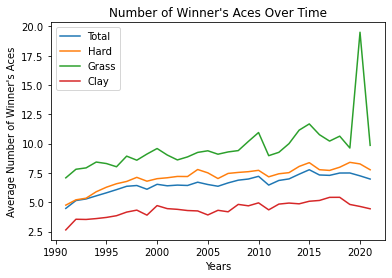

In [ ]:
import matplotlib.pyplot as plt
years = range(1968,2022)
plt.plot(years, yearlyLosersAces, label = "Total")
plt.xlabel("Years")
plt.ylabel("Average Number of Winner's Aces")
plt.title("Number of Winner's Aces Over Time")
plt.plot(years, yearlyAcesHard, label = "Hard")
plt.plot(years, yearlyAcesGrass, label = "Grass")
plt.plot(years, yearlyAcesClay, label = "Clay")
plt.legend()




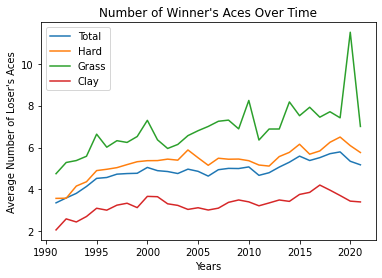

In [ ]:
plt.plot(years, yearlyLosersAces, label = "Total")
plt.xlabel("Years")
plt.ylabel("Average Number of Loser's Aces")
plt.title("Number of Winner's Aces Over Time")
plt.plot(years, yearlyAcesHardL, label = "Hard")
plt.plot(years, yearlyAcesGrassL, label = "Grass")
plt.plot(years, yearlyAcesClayL, label = "Clay")
plt.legend()

In this graph we can see that on grass, it seems much easiser to serve aces. A common reason forthis would be that grass has less traction and it's harder for the opposing player to get to the ball in time. The spike in 2020 for the grass is due to covid, and our dataset only had 2 games recorded on grass for that year. Even so, the trend is clear, where it's hardest to serve aces on clay. 

Comparing losers to winners, the result is expected, with losers serving noticeably less aces.

In [ ]:
#display(combined)

top4 = combined.loc[(combined['round'] == "F") | (combined['round'] == "SF") | (combined['tourney_level'] == "G")]
#display(top4)

# Draw a vertical bar chart

print(top4['winner_ioc'].value_counts())
#top4['winner_ioc'].value_counts().plot(kind='bar', figsize=(16, 9))
print(top4['winner_ioc'].value_counts()["USA"])

USA    8458
AUS    3334
ESP    3276
FRA    2648
SWE    2075
       ... 
TCH       1
URS       1
KEN       1
INA       1
IRI       1
Name: winner_ioc, Length: 82, dtype: int64
8458


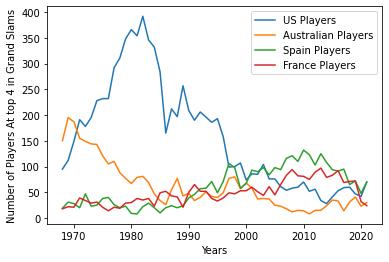

In [ ]:
# Where good players come from over time
plt.plot(years, USnumOfTop4, label = 'US Players')
plt.plot(years, AUSnumOfTop4, label = 'Australian Players')
plt.plot(years, ESPnumOfTop4, label = 'Spain Players')
plt.plot(years, FRAnumOfTop4, label = 'France Players')

plt.xlabel("Years")
plt.ylabel("Number of Players At top 4 in Grand Slams")
plt.legend()

LOL we fell off. Washed up region. 

[182.34983498349834, 182.15227070347285, 181.89511400651466, 182.48958862366683, 182.32646212847555, 181.93656422379826, 181.70344053851906, 181.39985512495474, 181.4168490153173, 182.17356173238525, 182.17900063251108, 182.70902505282223, 182.55652911249294, 182.450014240957, 182.99580382900604, 183.14154302670624, 183.6393958464443, 183.61497005988025, 183.57448818897637, 183.43741007194245, 183.34635488308115, 183.34514549121292, 183.82739264664608, 184.22594954255615, 184.63892653835728, 184.82095038067735, 184.9247339735271, 185.04727370400215, 185.26058631921825, 185.03660612939842, 184.68287103231341, 184.7820710973725, 184.8089716203845, 184.17411545623835, 184.51627457299386, 184.44355098102284, 184.9592092877314, 184.59016393442624, 184.9471853257432, 185.17994195420832, 185.69418145956607, 185.92167110519307, 186.0180466373775, 186.3782371028357, 186.36488706365506, 187.03943661971832, 187.08320802005014, 187.40761601133545, 187.12843403646764, 187.1811567842852, 187.8582484

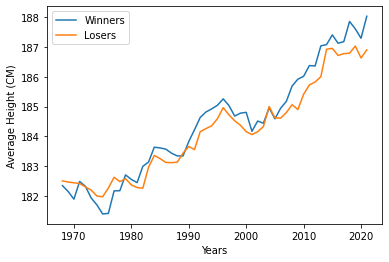

In [ ]:
# Heights of Losers VS Winners Over Time
print(averageWinnersHeight)
plt.plot(years, averageWinnersHeight, label = 'Winners')
plt.plot(years, averageLosersHeight, label = 'Losers')

plt.xlabel("Years")
plt.ylabel("Average Height (CM)")
plt.legend()

[182.34983498349834, 182.15227070347285, 181.89511400651466, 182.48958862366683, 182.32646212847555, 181.93656422379826, 181.70344053851906, 181.39985512495474, 181.4168490153173, 182.17356173238525, 182.17900063251108, 182.70902505282223, 182.55652911249294, 182.450014240957, 182.99580382900604, 183.14154302670624, 183.6393958464443, 183.61497005988025, 183.57448818897637, 183.43741007194245, 183.34635488308115, 183.34514549121292, 183.82739264664608, 184.22594954255615, 184.63892653835728, 184.82095038067735, 184.9247339735271, 185.04727370400215, 185.26058631921825, 185.03660612939842, 184.68287103231341, 184.7820710973725, 184.8089716203845, 184.17411545623835, 184.51627457299386, 184.44355098102284, 184.9592092877314, 184.59016393442624, 184.9471853257432, 185.17994195420832, 185.69418145956607, 185.92167110519307, 186.0180466373775, 186.3782371028357, 186.36488706365506, 187.03943661971832, 187.08320802005014, 187.40761601133545, 187.12843403646764, 187.1811567842852, 187.8582484

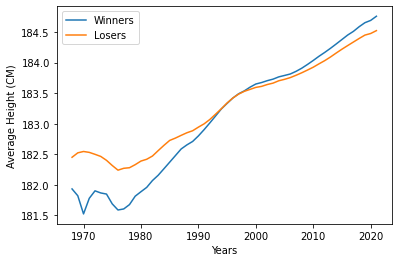

In [ ]:
# Heights of Losers VS Winners Over Time In Top 8
plt.plot(years, averageWinnersHeightTop8, label = 'Winners')
plt.plot(years, averageLosersHeightTop8, label = 'Losers')

plt.xlabel("Years")
plt.ylabel("Average Height (CM)")
plt.legend()

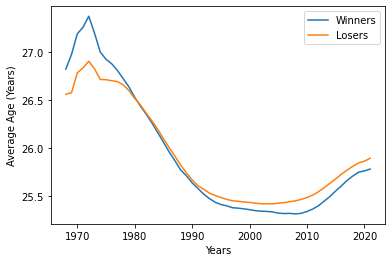

In [ ]:
# Ages of Losers VS Winners Over Time
plt.plot(years, averageWinnersAgeTop8, label = 'Winners')
plt.plot(years, averageLosersAgeTop8, label = 'Losers')

plt.xlabel("Years")
plt.ylabel("Average Age (Years)")
plt.legend()

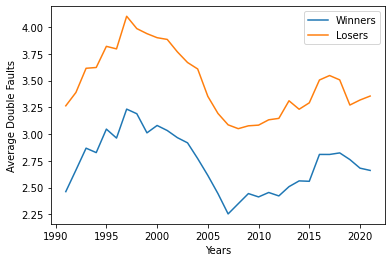

In [ ]:
# Double Faults of Losers VS Winners Over Time
plt.plot(years, doubleFaultsW, label = 'Winners')
plt.plot(years, doubleFaultsL, label = 'Losers')

plt.xlabel("Years")
plt.ylabel("Average Double Faults")
plt.legend()

Around 2005-6 ish people wanted more consistent serves, not giving up free points. After acheiving consistency, people tried to gain speed back, playing more high risk high rewards serves, resulting in more double faults.

In [ ]:
# How to select from columns 
# df.loc locates rows
# combined['surface'] == "Hard"
# returns a series (this is where types get annoying). Basically indices of trues and falses 
# df.loc[] takes this series in, and takes only the true indicies to make a new dataframe
# the syntax is dataframename['rowname'] == value (can be a string or a literal int)
# this works for other basic operators that have comparisons like < and >
# to get a range just filter twice, once with < once with >
print(combined['surface'] == "Hard")
hardSurface = combined.loc[combined['surface'] == "Hard"]
display(hardSurface)

# can also use 
hardSurfaceAnotherWay = combined[combined['surface'] == "Hard"]
# it's better practice to use .loc
# https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc 
# one its faster, two since types are implicit in python
# sometimes it's hard to tell when slices are copies, or views.
# so when we set values on slices, we aren't guaranteed to modify the original dataframe
# .loc guarantees that if we modify a slice given by .loc, it will modify the original dataframe

display(hardSurfaceAnotherWay)


0       False
1       False
2       False
3       False
4       False
        ...  
2722     True
2723     True
2724     True
2725     True
2726     True
Name: surface, Length: 180305, dtype: bool


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
457,1968-423,Los Angeles,Hard,64,A,1968-09-14,233,100046,NaN,NaN,Larry Nagler,R,NaN,USA,28.205339,107810,NaN,NaN,Mike Kreiss,R,NaN,USA,NaN,6-1 6-4,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,1968-423,Los Angeles,Hard,64,A,1968-09-14,234,100121,NaN,NaN,Raymond Moore,R,183.0,RSA,22.058864,208940,NaN,NaN,Leonzio Collas,U,NaN,USA,NaN,6-3 6-2,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,1968-423,Los Angeles,Hard,64,A,1968-09-14,235,109823,NaN,NaN,Ron Holmberg,R,185.0,USA,30.631075,208939,NaN,NaN,Bob Abbott,U,NaN,USA,NaN,6-1 6-2,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,1968-423,Los Angeles,Hard,64,A,1968-09-14,236,100127,NaN,NaN,Tom Gorman,R,180.0,USA,21.738535,114741,NaN,NaN,Sam Match,NaN,NaN,USA,45.697467,7-5 6-1,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,1968-423,Los Angeles,Hard,64,A,1968-09-14,237,100208,NaN,NaN,Dick R Bohrnstedt,R,NaN,USA,18.381930,208938,NaN,NaN,Gary Johnson,U,NaN,USA,NaN,8-6 6-4,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,2021-09-17,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,2021-09-17,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,2021-09-18,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,2021-09-18,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
457,1968-423,Los Angeles,Hard,64,A,1968-09-14,233,100046,NaN,NaN,Larry Nagler,R,NaN,USA,28.205339,107810,NaN,NaN,Mike Kreiss,R,NaN,USA,NaN,6-1 6-4,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,1968-423,Los Angeles,Hard,64,A,1968-09-14,234,100121,NaN,NaN,Raymond Moore,R,183.0,RSA,22.058864,208940,NaN,NaN,Leonzio Collas,U,NaN,USA,NaN,6-3 6-2,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,1968-423,Los Angeles,Hard,64,A,1968-09-14,235,109823,NaN,NaN,Ron Holmberg,R,185.0,USA,30.631075,208939,NaN,NaN,Bob Abbott,U,NaN,USA,NaN,6-1 6-2,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460,1968-423,Los Angeles,Hard,64,A,1968-09-14,236,100127,NaN,NaN,Tom Gorman,R,180.0,USA,21.738535,114741,NaN,NaN,Sam Match,NaN,NaN,USA,45.697467,7-5 6-1,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461,1968-423,Los Angeles,Hard,64,A,1968-09-14,237,100208,NaN,NaN,Dick R Bohrnstedt,R,NaN,USA,18.381930,208938,NaN,NaN,Gary Johnson,U,NaN,USA,NaN,8-6 6-4,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,2021-09-17,4,200416,NaN,NaN,August Holmgren,R,NaN,DEN,23.394935,106397,NaN,NaN,Wishaya Trongcharoenchaikul,R,NaN,THA,26.433949,6-4 6-4,3,RR,90.0,3.0,3.0,52.0,29.0,22.0,16.0,10.0,0.0,1.0,8.0,2.0,79.0,45.0,30.0,14.0,10.0,10.0,13.0,905.0,16.0,767.0,27.0
2723,2021-M-DC-2021-WG2-M-THA-DEN-01,Davis Cup WG2 R1: THA vs DEN,Hard,4,D,2021-09-17,5,208937,NaN,NaN,Kasidit Samrej,R,NaN,THA,20.629706,134087,NaN,NaN,Johannes Ingildsen,R,NaN,DEN,24.202601,7-5 6-3,3,RR,88.0,6.0,6.0,58.0,28.0,21.0,13.0,11.0,3.0,7.0,5.0,8.0,76.0,43.0,24.0,13.0,10.0,5.0,11.0,1136.0,8.0,1546.0,2.0
2724,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,2021-09-18,1,123795,NaN,NaN,Altug Celikbilek,U,NaN,TUR,25.015743,207669,NaN,NaN,Robert Strombachs,U,NaN,GER,21.995893,7-6(4) 6-4,3,RR,124.0,6.0,8.0,80.0,34.0,25.0,23.0,11.0,6.0,8.0,3.0,5.0,97.0,50.0,34.0,20.0,11.0,6.0,9.0,170.0,427.0,671.0,38.0
2725,2021-M-DC-2021-WG2-M-TUR-LAT-01,Davis Cup WG2 R1: TUR vs LAT,Hard,4,D,2021-09-18,2,117356,NaN,NaN,Cem Ilkel,R,185.0,TUR,26.064339,105208,NaN,NaN,Ernests Gulbis,R,190.0,LAT,33.037645,6-4 6-1,3,RR,65.0,2.0,2.0,41.0,27.0,23.0,7.0,9.0,0.0,1.0,1.0,5.0,45.0,21.0,16.0,7.0,8.0,2.0,7.0,176.0,408.0,196.0,359.0


In [ ]:
# This shows us games on a hardSurface where Nadal was the winner or the loser
# We use bitwise or here instead of or because of some pandas funkyness
# I'll explain in person
nadalOnHardSurface = hardSurface.loc[(hardSurface['winner_name'] == 'Rafael Nadal') | (hardSurface['loser_name'] == 'Rafael Nadal')]
display(nadalOnHardSurface)

test = combined.loc[(combined['surface'] == "Grass") & ((combined['winner_name'] == "Rafael Nadal") | (combined['loser_name'] == "Rafael Nadal"))]
display(test)
# nadalOnHardSurface = hardSurface.loc[(hardSurface['winner_name'] == 'Rafael Nadal')]
# display(nadalOnHardSurface)
# nadalOnHardSurface = hardSurface.loc[(hardSurface['loser_name'] == 'Rafael Nadal')]
# display(nadalOnHardSurface)



,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
4,2003-1536,Madrid Masters,Hard,48,M,2003-10-13,5,102374,NaN,WC,Alex Corretja,R,180.0,ESP,29.505818,104745,NaN,WC,Rafael Nadal,L,185.0,ESP,17.360712,6-2 3-6 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,290.0,49.0,788.0
2397,2003-560,US Open,Hard,128,G,2003-08-25,54,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.226557,102950,NaN,NaN,Fernando Vicente,R,180.0,ESP,26.464066,6-4 6-3 6-3,5,R128,133.0,2.0,4.0,82.0,46.0,37.0,23.0,14.0,3.0,3.0,9.0,8.0,111.0,65.0,44.0,19.0,14.0,14.0,18.0,45.0,786.0,61.0,616.0
2434,2003-560,US Open,Hard,128,G,2003-08-25,91,101962,22.0,NaN,Younes El Aynaoui,R,193.0,MAR,31.950719,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.226557,7-6(6) 6-3 7-6(6),5,R64,163.0,15.0,2.0,112.0,76.0,58.0,21.0,17.0,3.0,5.0,3.0,6.0,109.0,83.0,59.0,13.0,16.0,9.0,12.0,21.0,1260.0,45.0,786.0
14,2004-1536,Madrid Masters,Hard,48,M,2004-10-18,15,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,18.376454,102106,NaN,NaN,Davide Sanguinetti,R,188.0,ITA,32.147844,6-2 6-1,3,R64,62.0,2.0,4.0,47.0,27.0,23.0,9.0,8.0,5.0,6.0,1.0,2.0,41.0,21.0,11.0,6.0,7.0,3.0,8.0,50.0,755.0,75.0,521.0
30,2004-1536,Madrid Masters,Hard,48,M,2004-10-18,31,102434,14.0,NaN,Vincent Spadea,R,183.0,USA,30.250513,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,18.376454,6-4 4-6 6-3,3,R32,151.0,1.0,4.0,88.0,44.0,30.0,24.0,15.0,3.0,7.0,0.0,4.0,102.0,74.0,46.0,11.0,14.0,11.0,16.0,23.0,1200.0,50.0,755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-580,Australian Open,Hard,128,G,2021-02-08,211,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,111815,NaN,NaN,Cameron Norrie,L,188.0,GBR,25.464750,7-5 6-2 7-5,5,R32,134.0,7.0,1.0,82.0,56.0,43.0,18.0,16.0,0.0,1.0,9.0,4.0,104.0,74.0,51.0,7.0,16.0,7.0,12.0,2.0,9850.0,69.0,935.0
317,2021-580,Australian Open,Hard,128,G,2021-02-08,219,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,104926,16.0,NaN,Fabio Fognini,R,178.0,ITA,33.713895,6-3 6-4 6-2,5,R16,136.0,6.0,3.0,72.0,43.0,33.0,20.0,14.0,4.0,6.0,7.0,3.0,100.0,56.0,36.0,18.0,13.0,13.0,19.0,2.0,9850.0,17.0,2535.0
321,2021-580,Australian Open,Hard,128,G,2021-02-08,223,126774,5.0,NaN,Stefanos Tsitsipas,R,193.0,GRE,22.494182,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,3-6 2-6 7-6(4) 6-4 7-5,5,QF,245.0,17.0,0.0,136.0,84.0,66.0,36.0,26.0,1.0,4.0,15.0,2.0,151.0,103.0,80.0,28.0,25.0,3.0,5.0,6.0,5965.0,2.0,9850.0
1855,2021-0418,Washington,Hard,64,A,2021-08-02,293,144750,14.0,NaN,Lloyd Harris,R,193.0,RSA,24.435318,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,35.164956,6-4 1-6 6-4,3,R16,130.0,16.0,3.0,81.0,51.0,39.0,13.0,13.0,4.0,6.0,8.0,2.0,81.0,52.0,41.0,13.0,14.0,1.0,3.0,50.0,1303.0,3.0,8270.0


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2227,2003-540,Wimbledon,Grass,128,G,2003-06-23,11,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.054073,104339,NaN,NaN,Mario Ancic,R,196.0,CRO,19.230664,6-3 6-4 4-6 6-4,5,R128,184.0,2.0,0.0,131.0,98.0,65.0,21.0,20.0,11.0,14.0,15.0,6.0,134.0,73.0,58.0,20.0,19.0,11.0,16.0,76.0,569.0,68.0,609.0
2286,2003-540,Wimbledon,Grass,128,G,2003-06-23,70,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.054073,104014,NaN,WC,Lee Childs,R,NaN,GBR,21.032170,6-2 6-4 6-3,5,R64,121.0,3.0,2.0,78.0,50.0,39.0,16.0,14.0,2.0,4.0,9.0,5.0,89.0,52.0,36.0,14.0,13.0,13.0,19.0,76.0,569.0,489.0,43.0
2315,2003-540,Wimbledon,Grass,128,G,2003-06-23,99,103387,12.0,NaN,Paradorn Srichaphan,R,185.0,THA,24.024641,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.054073,6-4 6-4 6-2,5,R32,116.0,7.0,4.0,82.0,53.0,38.0,17.0,14.0,1.0,3.0,2.0,3.0,100.0,73.0,46.0,7.0,14.0,9.0,15.0,11.0,1760.0,76.0,569.0
1987,2005-500,Halle,Grass,32,A,2005-06-06,5,102565,NaN,WC,Alexander Waske,R,188.0,GER,30.184805,104745,3.0,NaN,Rafael Nadal,L,185.0,ESP,19.008898,4-6 7-5 6-3,3,R32,111.0,12.0,8.0,96.0,57.0,48.0,20.0,16.0,7.0,8.0,2.0,3.0,78.0,56.0,45.0,11.0,15.0,1.0,3.0,147.0,302.0,3.0,3600.0
2281,2005-540,Wimbledon,Grass,128,G,2005-06-20,48,104745,4.0,NaN,Rafael Nadal,L,185.0,ESP,19.047228,102434,NaN,NaN,Vincent Spadea,R,183.0,USA,30.921287,6-4 6-3 6-0,5,R128,91.0,7.0,0.0,66.0,45.0,38.0,12.0,12.0,1.0,1.0,3.0,4.0,89.0,58.0,35.0,11.0,13.0,6.0,12.0,3.0,3600.0,39.0,875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2019-540,Wimbledon,Grass,128,G,2019-07-01,187,104745,3.0,NaN,Rafael Nadal,L,185.0,ESP,33.075975,106401,NaN,NaN,Nick Kyrgios,R,193.0,AUS,24.177960,6-3 3-6 7-6(5) 7-6(3),5,R64,184.0,10.0,2.0,115.0,73.0,60.0,30.0,23.0,0.0,2.0,29.0,3.0,122.0,87.0,66.0,20.0,21.0,3.0,5.0,2.0,7945.0,43.0,1045.0
1609,2019-540,Wimbledon,Grass,128,G,2019-07-01,207,104745,3.0,NaN,Rafael Nadal,L,185.0,ESP,33.075975,104542,NaN,NaN,Jo-Wilfried Tsonga,R,188.0,FRA,34.203970,6-2 6-3 6-2,5,R32,108.0,11.0,1.0,63.0,44.0,39.0,14.0,13.0,0.0,0.0,11.0,4.0,81.0,45.0,31.0,13.0,12.0,6.0,11.0,2.0,7945.0,72.0,750.0
1619,2019-540,Wimbledon,Grass,128,G,2019-07-01,217,104745,3.0,NaN,Rafael Nadal,L,185.0,ESP,33.075975,105311,NaN,NaN,Joao Sousa,R,185.0,POR,30.253251,6-2 6-2 6-2,5,R16,105.0,5.0,3.0,61.0,35.0,30.0,18.0,12.0,0.0,0.0,4.0,0.0,76.0,52.0,29.0,11.0,12.0,2.0,8.0,2.0,7945.0,69.0,770.0
1624,2019-540,Wimbledon,Grass,128,G,2019-07-01,222,104745,3.0,NaN,Rafael Nadal,L,185.0,ESP,33.075975,105023,NaN,NaN,Sam Querrey,R,198.0,USA,31.731691,7-5 6-2 6-2,5,QF,127.0,10.0,2.0,92.0,55.0,45.0,20.0,14.0,6.0,7.0,22.0,3.0,92.0,56.0,41.0,10.0,14.0,10.0,16.0,2.0,7945.0,65.0,830.0


[0.9331866  0.25480428 0.79678686 0.03741477 0.74310992 0.20835492
 0.25060312 0.89250951 0.27457272 0.08399729 0.60059311 0.52330187
 0.20386201 0.25088389 0.12599381 0.16064741 0.44671923 0.45619923
 0.20175533 0.94440012 0.70153661 0.84760347 0.17426941 0.99173274
 0.73750606 0.04347652 0.48536869 0.52656752 0.18598101 0.83124448
 0.06510337 0.13392944 0.1821483  0.66113205 0.33979723 0.63441472
 0.26965321 0.90873599 0.2438183  0.27818353 0.1351412  0.43848437
 0.52178791 0.86603183 0.95849939 0.27795836 0.29348092 0.0330267
 0.19311101 0.01890161 0.15983527 0.79380067 0.63172551 0.6208422
 0.7078959  0.1871617  0.66544318 0.25592549 0.63053787 0.37011999
 0.90577672 0.79935124 0.05063646 0.35234723 0.56275279 0.83616033
 0.72264898 0.91475531 0.29886282 0.02264739 0.06125638 0.80152726
 0.8304402  0.55267548 0.8899924  0.86579902 0.33467191 0.92291966
 0.82167026 0.57234971 0.04453599 0.97338227 0.78706031 0.62432105
 0.1497431  0.10045939 0.47837536 0.30790952 0.22806761 0.076124

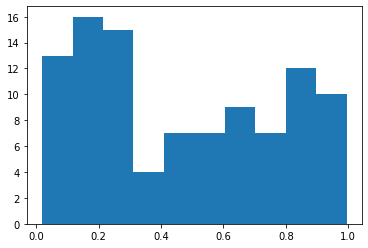

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Once we have data we want, we can do some regression and analysis.
# But first, crash course on statistics. Probably will take the rest of this session.
# Example of the central limit theorem 
# https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.
# Lets take a sample of 100 people from a population
random = np.random.rand(100) 
print(random)
plt.hist(random)

sampleMeans = []
# Lets take 100 of such samples, whats they're mean
for i in range(1000):
  random = np.random.rand(100)
  sampleMeans.append(np.mean(random))

(array([ 1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,
         5.,  3.,  2.,  1.,  4.,  7.,  5.,  4.,  3.,  2., 13.,  6.,  8.,
         4.,  7., 10., 14., 10., 15.,  8.,  5., 15., 16., 19., 13., 13.,
        23., 25., 21., 17., 31., 23., 24., 26., 27., 25., 22., 24., 30.,
        23., 28., 26., 33., 22., 19., 26., 20., 21., 21.,  9., 20., 24.,
        12., 17., 18., 15., 13., 14.,  8.,  6., 14.,  5.,  4.,  3.,  5.,
         3.,  5.,  7.,  2.,  5.,  0.,  0.,  0.,  0.,  4.,  4.,  1.,  1.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([0.40811739, 0.40994827, 0.41177915, 0.41361002, 0.4154409 ,
        0.41727178, 0.41910265, 0.42093353, 0.42276441, 0.42459528,
        0.42642616, 0.42825704, 0.43008791, 0.43191879, 0.43374967,
        0.43558054, 0.43741142, 0.4392423 , 0.44107318, 0.44290405,
        0.44473493, 0.44656581, 0.44839668, 0.45022756, 0.45205844,
        0.45388931, 0.45572019, 0.45755107, 0.45938194, 0.46121282,
        0.4630437 , 0.4648

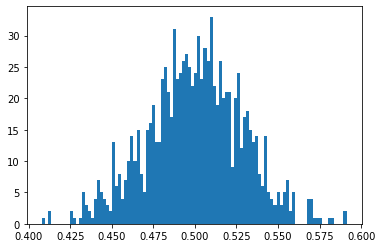

In [ ]:
plt.hist(sampleMeans, bins =100)

[1.42687093e-01 6.18380334e-01 1.70412611e+00 6.31393030e-01
 1.43886090e+00 1.30700916e+00 1.13617020e+00 4.21837980e+00
 1.40796589e+00 1.25469876e-01 3.82080266e+00 2.11508772e-01
 5.98602674e-01 6.94559245e+00 1.85359555e-01 4.68552893e-01
 1.29458523e+00 2.57875467e+00 1.05243952e+00 9.71547898e-01
 2.45962928e+00 3.42090854e-01 4.10460998e+00 2.47609208e+00
 1.29668848e+00 1.48759384e+00 5.46135992e+00 2.81512780e+00
 3.13604876e+00 2.99667502e+00 2.96119283e+00 3.09901627e+00
 2.76973554e+00 2.82380344e+00 3.76904700e-01 1.36517884e-03
 4.78155565e+00 2.80980867e-01 2.07988594e-01 3.56150945e+00
 1.45866602e+00 8.12931065e+00 4.48707707e+00 1.56879723e+00
 3.05632735e+00 3.30733740e-01 2.24985490e+00 1.04708404e-01
 4.06263414e-01 1.41293662e+00 2.62854203e+00 9.27922959e-01
 1.04666018e+00 1.98073338e+00 2.12645221e+00 6.02664974e-01
 2.99034499e-01 3.80755163e-01 2.73161826e+00 5.33167732e-01
 3.08143172e-01 6.75494476e-01 1.43042270e-01 4.73712878e+00
 1.47575795e+00 6.274300

(array([36., 23., 12., 17.,  4.,  5.,  1.,  0.,  1.,  1.]),
 array([1.36517884e-03, 8.14159726e-01, 1.62695427e+00, 2.43974882e+00,
        3.25254337e+00, 4.06533791e+00, 4.87813246e+00, 5.69092701e+00,
        6.50372155e+00, 7.31651610e+00, 8.12931065e+00]),
 <a list of 10 Patch objects>)

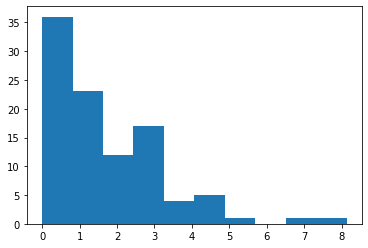

In [ ]:
exp = np.random.exponential(2,100)
print(exp)
fig2 = plt.hist(exp)
fig2

(array([ 2.,  8., 25., 45., 29., 57., 23.,  7.,  1.,  3.]),
 array([1.43923389, 1.55974185, 1.6802498 , 1.80075775, 1.92126571,
        2.04177366, 2.16228161, 2.28278956, 2.40329752, 2.52380547,
        2.64431342]),
 <a list of 10 Patch objects>)

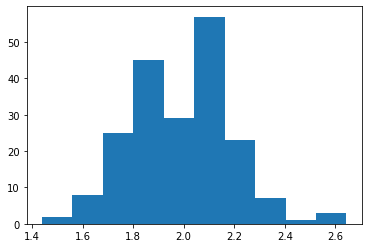

In [ ]:
sampleMeans = []
for i in range(200):
  exp = np.random.exponential(2,100)
  sampleMeans.append(np.mean(exp))

plt.hist(sampleMeans)

# The conclusion is that with enough samples, the sample means follow a consistent pattern, called the normal distribution
# Regardless of the population distribution
# In addition, the mean of the sample means is an unbiased estimator of the population mean

In [ ]:
# Population distribution is unknown
# We take a sample - we can see this distribution.
# we take a lot of samples - we can see the distribution of the means of this sample

# The weights of adult males are normally distributed with a mean of 180 pounds and a standard dev of 30 lbs
# standard normal is a normal distribution with mean = 0 and stdev = 1
# i have an adult male 150 pounds.
# (240-180)/30 -> 2

# Given a population
# we take a bunch of samples ->> we have to check that we have taken enough samples >30
# Due to central limit theorem, sample means are normally distributed.

# Choose a significance level (alpha = 0.05)
# One sided Z-test
# Population standard deviation is 30
# I think that the america is obese. I think that the mean weight of adult males is 210
# Ho: Mean = 210 (Initial hypothesis)
# Ha: Mean < 210  (Alternative Hypothesis)
# I take a sample > 30 (so our sample means are guaratneed to be approximately normal)
# The weights of adult males within the sample are normally distributed with a mean of 180 pounds
# Standar deviation of our SAMPLE = 30/sqrt(n) where n = sample size
# (210-180) / (30/sqrt(30)) --> Z score of 5.47722557505 --> probability of zero


# If the p-value low reject the ho
# If your p-value is higher than your significance level -> fail to reject the ho.

# From your sample -> check that the sample size big enough > 30
# Calculate the z score of the sample mean and stdev.

In [ ]:
# Now that we've proven the central limit theorem, we can go to the normal distribution and z scores and the meaning of p-values
# And from there we can get to hypothesis testing (what we care about)

# Lets do some examples with the normal distribution
#

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
4,2003-1536,Madrid Masters,Hard,48,M,2003-10-13,5,102374,NaN,WC,Alex Corretja,R,180.0,ESP,29.505818,104745,NaN,WC,Rafael Nadal,L,185.0,ESP,17.360712,6-2 3-6 6-4,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,290.0,49.0,788.0
2397,2003-560,US Open,Hard,128,G,2003-08-25,54,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.226557,102950,NaN,NaN,Fernando Vicente,R,180.0,ESP,26.464066,6-4 6-3 6-3,5,R128,133.0,2.0,4.0,82.0,46.0,37.0,23.0,14.0,3.0,3.0,9.0,8.0,111.0,65.0,44.0,19.0,14.0,14.0,18.0,45.0,786.0,61.0,616.0
2434,2003-560,US Open,Hard,128,G,2003-08-25,91,101962,22.0,NaN,Younes El Aynaoui,R,193.0,MAR,31.950719,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,17.226557,7-6(6) 6-3 7-6(6),5,R64,163.0,15.0,2.0,112.0,76.0,58.0,21.0,17.0,3.0,5.0,3.0,6.0,109.0,83.0,59.0,13.0,16.0,9.0,12.0,21.0,1260.0,45.0,786.0
14,2004-1536,Madrid Masters,Hard,48,M,2004-10-18,15,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,18.376454,102106,NaN,NaN,Davide Sanguinetti,R,188.0,ITA,32.147844,6-2 6-1,3,R64,62.0,2.0,4.0,47.0,27.0,23.0,9.0,8.0,5.0,6.0,1.0,2.0,41.0,21.0,11.0,6.0,7.0,3.0,8.0,50.0,755.0,75.0,521.0
30,2004-1536,Madrid Masters,Hard,48,M,2004-10-18,31,102434,14.0,NaN,Vincent Spadea,R,183.0,USA,30.250513,104745,NaN,NaN,Rafael Nadal,L,185.0,ESP,18.376454,6-4 4-6 6-3,3,R32,151.0,1.0,4.0,88.0,44.0,30.0,24.0,15.0,3.0,7.0,0.0,4.0,102.0,74.0,46.0,11.0,14.0,11.0,16.0,23.0,1200.0,50.0,755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-580,Australian Open,Hard,128,G,2021-02-08,211,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,111815,NaN,NaN,Cameron Norrie,L,188.0,GBR,25.464750,7-5 6-2 7-5,5,R32,134.0,7.0,1.0,82.0,56.0,43.0,18.0,16.0,0.0,1.0,9.0,4.0,104.0,74.0,51.0,7.0,16.0,7.0,12.0,2.0,9850.0,69.0,935.0
317,2021-580,Australian Open,Hard,128,G,2021-02-08,219,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,104926,16.0,NaN,Fabio Fognini,R,178.0,ITA,33.713895,6-3 6-4 6-2,5,R16,136.0,6.0,3.0,72.0,43.0,33.0,20.0,14.0,4.0,6.0,7.0,3.0,100.0,56.0,36.0,18.0,13.0,13.0,19.0,2.0,9850.0,17.0,2535.0
321,2021-580,Australian Open,Hard,128,G,2021-02-08,223,126774,5.0,NaN,Stefanos Tsitsipas,R,193.0,GRE,22.494182,104745,2.0,NaN,Rafael Nadal,L,185.0,ESP,34.685832,3-6 2-6 7-6(4) 6-4 7-5,5,QF,245.0,17.0,0.0,136.0,84.0,66.0,36.0,26.0,1.0,4.0,15.0,2.0,151.0,103.0,80.0,28.0,25.0,3.0,5.0,6.0,5965.0,2.0,9850.0
1855,2021-0418,Washington,Hard,64,A,2021-08-02,293,144750,14.0,NaN,Lloyd Harris,R,193.0,RSA,24.435318,104745,1.0,NaN,Rafael Nadal,L,185.0,ESP,35.164956,6-4 1-6 6-4,3,R16,130.0,16.0,3.0,81.0,51.0,39.0,13.0,13.0,4.0,6.0,8.0,2.0,81.0,52.0,41.0,13.0,14.0,1.0,3.0,50.0,1303.0,3.0,8270.0


,surface,winner_hand,winner_ht,winner_age,w_ace,winner_rank
4,Hard,R,180.0,29.505818,NaN,127.0
2397,Hard,L,185.0,17.226557,2.0,45.0
2434,Hard,R,193.0,31.950719,15.0,21.0
14,Hard,L,185.0,18.376454,2.0,50.0
30,Hard,R,183.0,30.250513,1.0,23.0
...,...,...,...,...,...,...
309,Hard,L,185.0,34.685832,7.0,2.0
317,Hard,L,185.0,34.685832,6.0,2.0
321,Hard,R,193.0,22.494182,17.0,6.0
1855,Hard,R,193.0,24.435318,16.0,50.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f344f655950>,
      dtype=object)

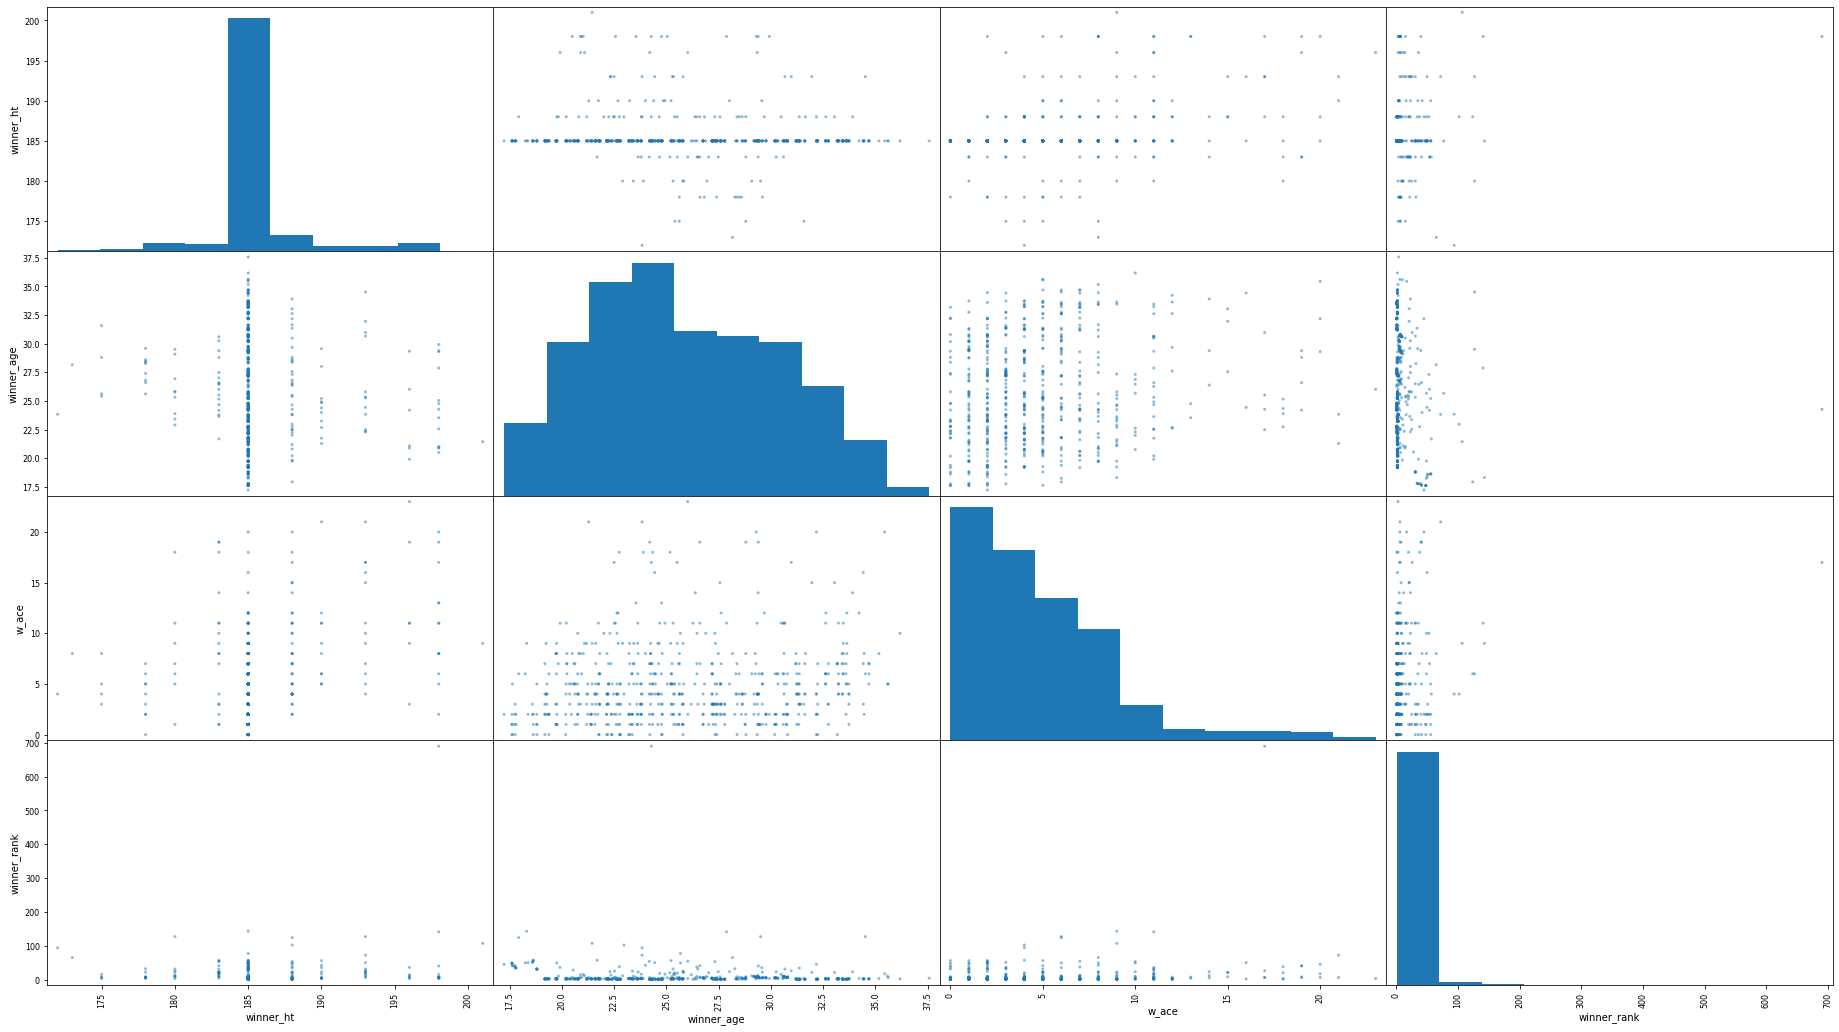

In [ ]:
display(nadalOnHardSurface)
columnsWeWant = ['surface', 'winner_hand','winner_ht','winner_age','w_ace','winner_rank']
dataToPlot = nadalOnHardSurface[columnsWeWant]
display(dataToPlot)
pd.plotting.scatter_matrix(dataToPlot,figsize=(32,18))


In [ ]:
# Let's segment on right handed winners over time
rightHanded = combined.loc[(combined['winner_hand'] == "R") & (combined['minutes'] != "Nan")]
df = rightHanded

# Split by decades
from1970 = df.loc[df['tourney_date'] > datetime.datetime(1970, 1, 1)]
from1970to1980 = from1970.loc[from1970['tourney_date'] < datetime.datetime(1979, 12, 31)]
display(from1970to1980)

from1980 = df.loc[df['tourney_date'] > datetime.datetime(1980, 1, 1)]
from1980to1990 = from1980.loc[from1980['tourney_date'] < datetime.datetime(1989, 12, 31)]
display(from1980to1990)

from1990 = df.loc[df['tourney_date'] > datetime.datetime(1990, 1, 1)]
from1990to2000 = from1990.loc[from1990['tourney_date'] < datetime.datetime(1999, 12, 31)]
display(from1990to2000)

from2000 = df.loc[df['tourney_date'] > datetime.datetime(2000, 1, 1)]
from2000to2010 = from2000.loc[from2000['tourney_date'] < datetime.datetime(2009, 12, 31)]
display(from2000to2010)

from2010 = df.loc[df['tourney_date'] > datetime.datetime(2010, 1, 1)]
from2010to2020 = from2010.loc[from2010['tourney_date'] < datetime.datetime(2019, 12, 31)]
display(from2010to2020)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1970-2029,Dublin,Grass,32,A,1970-07-06,271,100106,NaN,NaN,Graham Stilwell,R,173.0,GBR,24.637919,125672,NaN,NaN,Kenneth Reid,U,NaN,IRL,NaN,6-0 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-2029,Dublin,Grass,32,A,1970-07-06,274,100060,NaN,NaN,Marty Riessen,R,185.0,USA,28.585900,209674,NaN,NaN,Frank Mcardle,U,NaN,IRL,NaN,6-1 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-2029,Dublin,Grass,32,A,1970-07-06,275,100084,NaN,NaN,Tom Okker,R,178.0,NED,26.368241,209673,NaN,NaN,T Grane,U,NaN,NaN,NaN,6-2 6-0,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1970-2029,Dublin,Grass,32,A,1970-07-06,278,110017,NaN,NaN,John McDonald,R,NaN,NZL,39.416838,209592,NaN,NaN,Ronan Fearon,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970-2029,Dublin,Grass,32,A,1970-07-06,279,100051,NaN,NaN,Premjit Lall,R,NaN,IND,29.708419,209671,NaN,NaN,J Williamson,U,NaN,IRL,NaN,6-0 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,1979-D050,Davis Cup EUR F: TCH vs SWE,Clay,4,D,1979-09-14,2,100437,NaN,NaN,Bjorn Borg,R,180.0,SWE,23.271732,100656,NaN,NaN,Ivan Lendl,R,188.0,USA,19.520876,6-4 7-5 6-2,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,29.0,NaN
3938,1979-D050,Davis Cup EUR F: TCH vs SWE,Clay,4,D,1979-09-14,4,100656,NaN,NaN,Ivan Lendl,R,188.0,USA,19.520876,100228,NaN,NaN,Kjell Johansson,R,NaN,SWE,28.585900,8-10 6-4 6-4 4-6 6-1,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,82.0,NaN
3939,1979-D050,Davis Cup EUR F: TCH vs SWE,Clay,4,D,1979-09-14,5,100667,NaN,NaN,Per Hjertquist,R,183.0,SWE,19.438741,100434,NaN,NaN,Tomas Smid,R,190.0,CZE,23.318275,5-3 RET,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,NaN
3940,1979-D051,Davis Cup WG PR: TPE vs THA,Hard,4,D,1979-10-31,1,110141,NaN,NaN,Chang Rung Wu,R,NaN,TPE,22.321697,108335,NaN,NaN,Supoj Meesawad,R,NaN,THA,NaN,2-6 6-3 4-6 6-2 7-5,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
3944,1979-605,Masters,Carpet,8,M,1980-01-09,1,100342,NaN,NaN,Vitas Gerulaitis,R,183.0,USA,25.456537,100581,NaN,NaN,John McEnroe,L,180.0,USA,20.895277,3-6 7-6 7-6,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN
3947,1979-605,Masters,Carpet,8,M,1980-01-09,4,100437,NaN,NaN,Bjorn Borg,R,180.0,SWE,23.592060,100581,NaN,NaN,John McEnroe,L,180.0,USA,20.895277,6-7 6-3 7-6,3,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN
3948,1979-605,Masters,Carpet,8,M,1980-01-09,5,100342,NaN,NaN,Vitas Gerulaitis,R,183.0,USA,25.456537,100286,NaN,NaN,Harold Solomon,R,168.0,USA,27.310062,6-1 7-6,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,8.0,NaN
3950,1979-605,Masters,Carpet,8,M,1980-01-09,7,100342,NaN,NaN,Vitas Gerulaitis,R,183.0,USA,25.456537,100284,NaN,NaN,Jimmy Connors,L,178.0,USA,27.351129,7-5 6-2,3,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN
3951,1979-605,Masters,Carpet,8,M,1980-01-09,8,100437,NaN,NaN,Bjorn Borg,R,180.0,SWE,23.592060,100342,NaN,NaN,Vitas Gerulaitis,R,183.0,USA,25.456537,6-2 6-2,3,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,1989-D073,Davis Cup G2 QF: SRI vs TPE,Clay,4,D,1989-04-07,5,106580,NaN,NaN,Arjun Fernando,R,NaN,SRI,NaN,110141,NaN,NaN,Chang Rung Wu,R,NaN,TPE,31.745380,2-6 7-5 6-3 2-6 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3579,1989-D074,Davis Cup WG SF: SWE vs YUG,Clay,4,D,1989-07-21,1,101298,NaN,NaN,Jonas Svensson,R,188.0,SWE,22.737851,101964,NaN,NaN,Goran Ivanisevic,L,193.0,CRO,17.842574,6-4 7-6(7) 3-6 6-4,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,51.0,NaN
3580,1989-D074,Davis Cup WG SF: SWE vs YUG,Clay,4,D,1989-07-21,2,101062,NaN,NaN,Mats Wilander,R,183.0,SWE,24.900753,101030,NaN,NaN,Goran Prpic,R,180.0,CRO,25.201916,7-6(7) 6-1 6-0,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,68.0,NaN
3581,1989-D074,Davis Cup WG SF: SWE vs YUG,Clay,4,D,1989-07-21,4,101298,NaN,NaN,Jonas Svensson,R,188.0,SWE,22.737851,101030,NaN,NaN,Goran Prpic,R,180.0,CRO,25.201916,6-7(3) 6-4 7-6(7) 3-6 6-3,5,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,68.0,NaN


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
62,1990-301,Auckland,Hard,32,A,1990-01-08,1,101230,1.0,NaN,Andrei Chesnokov,R,188.0,RUS,23.931554,101482,NaN,Q,Markus Zoecke,R,196.0,GER,21.664613,7-6 6-7 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,714.0,136.0,169.0
63,1990-301,Auckland,Hard,32,A,1990-01-08,2,101191,NaN,NaN,Richey Reneberg,R,180.0,USA,24.260096,101332,NaN,NaN,Gilad Bloom,L,173.0,ISR,22.858316,6-3 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,433.0,100.0,233.0
64,1990-301,Auckland,Hard,32,A,1990-01-08,3,101529,NaN,NaN,Michael Stich,R,193.0,GER,21.223819,101022,NaN,Q,Kelly Jones,R,185.0,USA,25.774127,7-5 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,249.0,119.0,204.0
67,1990-301,Auckland,Hard,32,A,1990-01-08,6,101061,NaN,NaN,Jimmy Arias,R,175.0,USA,25.396304,101387,NaN,NaN,Claudio Pistolesi,R,180.0,ITA,22.373717,6-3 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,353.0,106.0,224.0
68,1990-301,Auckland,Hard,32,A,1990-01-08,7,101358,NaN,NaN,Olivier Delaitre,R,170.0,FRA,22.606434,101235,NaN,NaN,Paul Haarhuis,R,188.0,NED,23.885010,6-2 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,216.0,75.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,1999-615,Dusseldorf,Clay,64,A,1999-05-16,293,102374,NaN,NaN,Alex Corretja,R,180.0,ESP,25.097878,103017,NaN,NaN,Nicolas Kiefer,R,183.0,GER,21.864476,6-3 4-6 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2849.0,21.0,1529.0
3330,1999-615,Dusseldorf,Clay,64,A,1999-05-16,291,102845,NaN,NaN,Carlos Moya,R,190.0,ESP,22.718686,103163,NaN,NaN,Tommy Haas,R,188.0,GER,21.119781,7-6(3) 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3080.0,19.0,1640.0
3331,1999-615,Dusseldorf,Clay,64,A,1999-05-16,285,102358,NaN,NaN,Thomas Enqvist,R,190.0,SWE,25.177276,103163,NaN,NaN,Tommy Haas,R,188.0,GER,21.119781,6-4 6-4,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1739.0,19.0,1640.0
3332,1999-615,Dusseldorf,Clay,64,A,1999-05-16,284,103017,NaN,NaN,Nicolas Kiefer,R,183.0,GER,21.864476,102563,NaN,NaN,Thomas Johansson,R,180.0,SWE,24.147844,6-2 6-3,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1529.0,18.0,1650.0


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,2000-01-10,1,103163,1.0,NaN,Tommy Haas,R,188.0,GER,21.771389,101543,NaN,NaN,Jeff Tarango,L,180.0,USA,31.137577,7-5 4-6 7-5,3,R32,108.0,18.0,4.0,96.0,49.0,39.0,28.0,17.0,3.0,5.0,7.0,8.0,106.0,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,2000-01-10,2,102607,NaN,Q,Juan Balcells,R,190.0,ESP,24.558522,102644,NaN,NaN,Franco Squillari,L,183.0,ARG,24.386037,7-5 7-5,3,R32,85.0,5.0,3.0,76.0,52.0,39.0,13.0,12.0,5.0,6.0,5.0,10.0,74.0,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,2000-01-10,3,103252,NaN,NaN,Alberto Martin,R,175.0,ESP,21.390828,102238,NaN,NaN,Alberto Berasategui,R,173.0,ESP,26.535250,6-3 6-1,3,R32,56.0,0.0,0.0,55.0,35.0,25.0,12.0,8.0,1.0,1.0,0.0,6.0,56.0,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,2000-01-10,4,103507,7.0,NaN,Juan Carlos Ferrero,R,183.0,ESP,19.909651,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.422998,6-4 6-4,3,R32,68.0,5.0,1.0,53.0,28.0,26.0,15.0,10.0,0.0,0.0,11.0,2.0,70.0,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,2000-01-10,5,102103,NaN,Q,Michael Sell,R,180.0,USA,27.381246,102765,4.0,NaN,Nicolas Escude,R,185.0,FRA,23.770021,0-6 7-6(7) 6-1,3,R32,115.0,1.0,2.0,98.0,66.0,39.0,14.0,13.0,6.0,11.0,8.0,8.0,92.0,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,2009-615,Dusseldorf,Clay,32,A,2009-05-17,286,104417,NaN,NaN,Robin Soderling,R,193.0,SWE,24.758385,105023,NaN,NaN,Sam Querrey,R,198.0,USA,21.612594,6-2 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1775.0,56.0,1100.0
3081,2009-615,Dusseldorf,Clay,32,A,2009-05-17,284,104678,NaN,NaN,Viktor Troicki,R,193.0,SRB,23.266256,105095,NaN,NaN,Evgeny Korolev,R,185.0,KAZ,21.256674,6-2 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,1437.0,102.0,774.0
3082,2009-615,Dusseldorf,Clay,32,A,2009-05-17,280,104620,NaN,NaN,Simone Bolelli,R,183.0,ITA,23.608487,105720,NaN,NaN,Stanislav Vovk,R,185.0,RUS,18.242300,7-6(1) 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,1051.0,1137.0,10.0
3083,2009-615,Dusseldorf,Clay,32,A,2009-05-17,277,105023,NaN,NaN,Sam Querrey,R,198.0,USA,21.612594,102783,NaN,NaN,Rainer Schuettler,R,180.0,GER,33.062286,2-6 6-4 6-2,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,1100.0,29.0,1645.0


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2010-339,Brisbane,Hard,32,A,2010-01-03,1,104053,1.0,NaN,Andy Roddick,R,188.0,USA,27.348392,103429,NaN,NaN,Peter Luczak,R,183.0,AUS,30.346338,7-6(5) 6-2,3,R32,84.0,15.0,0.0,63.0,42.0,36.0,14.0,10.0,3.0,3.0,4.0,2.0,56.0,34.0,29.0,11.0,10.0,3.0,5.0,7.0,4410.0,77.0,598.0
2,2010-339,Brisbane,Hard,32,A,2010-01-03,3,104755,NaN,NaN,Richard Gasquet,R,185.0,FRA,23.548255,103813,NaN,NaN,Jarkko Nieminen,L,185.0,FIN,28.451745,6-3 4-6 6-4,3,R32,121.0,5.0,4.0,97.0,51.0,33.0,27.0,15.0,5.0,8.0,4.0,0.0,85.0,58.0,38.0,14.0,14.0,7.0,11.0,52.0,850.0,88.0,568.0
3,2010-339,Brisbane,Hard,32,A,2010-01-03,4,105051,NaN,Q,Matthew Ebden,R,188.0,AUS,22.108145,103781,6.0,NaN,Jurgen Melzer,L,183.0,AUT,28.621492,7-5 6-1,3,R32,64.0,12.0,1.0,50.0,35.0,30.0,12.0,10.0,3.0,3.0,2.0,1.0,53.0,29.0,16.0,15.0,9.0,2.0,5.0,285.0,151.0,28.0,1260.0
4,2010-339,Brisbane,Hard,32,A,2010-01-03,5,104607,4.0,NaN,Tomas Berdych,R,196.0,CZE,24.298426,105194,NaN,Q,Nick Lindahl,R,183.0,AUS,21.429158,6-2 6-4,3,R32,69.0,3.0,1.0,46.0,27.0,24.0,14.0,9.0,1.0,1.0,6.0,1.0,69.0,41.0,26.0,14.0,9.0,6.0,9.0,20.0,1655.0,251.0,179.0
5,2010-339,Brisbane,Hard,32,A,2010-01-03,6,104571,NaN,NaN,Marcos Baghdatis,R,183.0,CYP,24.550308,103888,NaN,NaN,Mardy Fish,R,188.0,USA,28.071184,7-5 7-5,3,R32,101.0,7.0,5.0,62.0,32.0,27.0,17.0,12.0,0.0,1.0,7.0,3.0,77.0,36.0,28.0,20.0,12.0,3.0,6.0,42.0,945.0,55.0,790.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,291,126207,2.0,NaN,Frances Tiafoe,R,188.0,USA,21.787817,200005,3.0,NaN,Ugo Humbert,L,188.0,FRA,21.357974,4-2 4-3(5) 3-4(4) 4-1,3,RR,102.0,1.0,1.0,75.0,54.0,39.0,12.0,11.0,3.0,3.0,9.0,5.0,78.0,39.0,31.0,18.0,12.0,5.0,8.0,47.0,1050.0,55.0,972.0
2791,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,290,126207,2.0,NaN,Frances Tiafoe,R,188.0,USA,21.787817,144707,6.0,NaN,Mikael Ymer,R,183.0,SWE,21.152635,4-2 4-2 4-2,3,RR,66.0,2.0,0.0,52.0,37.0,27.0,9.0,9.0,4.0,4.0,6.0,0.0,46.0,34.0,23.0,7.0,9.0,3.0,6.0,47.0,1050.0,74.0,765.0
2792,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,289,206173,8.0,NaN,Jannik Sinner,R,188.0,ITA,18.217659,126207,2.0,NaN,Frances Tiafoe,R,188.0,USA,21.787817,3-4(4) 4-2 4-2 4-2,3,RR,86.0,14.0,4.0,71.0,44.0,37.0,14.0,12.0,4.0,4.0,7.0,0.0,69.0,47.0,37.0,10.0,12.0,2.0,5.0,95.0,596.0,47.0,1050.0
2793,2019-7696,NextGen Finals,Hard,8,F,2019-11-05,288,144707,6.0,NaN,Mikael Ymer,R,183.0,SWE,21.152635,200005,3.0,NaN,Ugo Humbert,L,188.0,FRA,21.357974,4-3(2) 1-4 4-2 4-1,3,RR,101.0,4.0,2.0,63.0,38.0,30.0,13.0,11.0,3.0,5.0,5.0,3.0,64.0,34.0,23.0,18.0,11.0,1.0,4.0,74.0,765.0,55.0,972.0


In [ ]:
print(from1970to1980['minutes'].mean())
print(from1980to1990['minutes'].mean())
print(from1990to2000['minutes'].mean())
print(from2000to2010['minutes'].mean())
print(from2010to2020['minutes'].mean())

print(from1970to1980['minutes'].count())
print(from1980to1990['minutes'].count())
print(from1990to2000['minutes'].count())
print(from2000to2010['minutes'].count())
print(from2010to2020['minutes'].count())

nan
nan
97.71447577357195
102.62736334150779
107.73723280565244
0
0
23301
25282
22362


In [ ]:
# Let's segment on left handed winners over time
leftHanded = combined.loc[combined['winner_hand'] == "L"]
df = leftHanded
from1970 = df.loc[df['tourney_date'] > datetime.datetime(1970, 1, 1)]
from1970to1980 = from1970.loc[from1970['tourney_date'] < datetime.datetime(1979, 12, 31)]
display(from1970to1980)

from1980 = df.loc[df['tourney_date'] > datetime.datetime(1980, 1, 1)]
from1980to1990 = from1980.loc[from1980['tourney_date'] < datetime.datetime(1989, 12, 31)]
display(from1980to1990)

from1990 = df.loc[df['tourney_date'] > datetime.datetime(1990, 1, 1)]
from1990to2000 = from1990.loc[from1990['tourney_date'] < datetime.datetime(1999, 12, 31)]
display(from1990to2000)

from2000 = df.loc[df['tourney_date'] > datetime.datetime(2000, 1, 1)]
from2000to2010 = from2000.loc[from2000['tourney_date'] < datetime.datetime(2009, 12, 31)]
display(from2000to2010)

from2010 = df.loc[df['tourney_date'] > datetime.datetime(2010, 1, 1)]
from2010to2020 = from2010.loc[from2010['tourney_date'] < datetime.datetime(2019, 12, 31)]
display(from2010to2020)

In [ ]:
print(from1970to1980['minutes'].mean())
print(from1980to1990['minutes'].mean())
print(from1990to2000['minutes'].mean())
print(from2000to2010['minutes'].mean())
print(from2010to2020['minutes'].mean())

print(from1970to1980['minutes'].count())
print(from1980to1990['minutes'].count())
print(from1990to2000['minutes'].count())
print(from2000to2010['minutes'].count())
print(from2010to2020['minutes'].count())

right_handed_win_gametime_1990to2000 = from1990to2000['minutes'].mean()
right_handed_win_gametime_2000to2010 = from2000to2010['minutes'].mean()
right_handed_win_gametime_2010to2020 = from2010to2020['minutes'].mean()


nan
nan
96.23675889328064
101.56015960712094
110.69237410071942
0
0
5060
3258
3475


In [ ]:
!pwd

/content


In [ ]:
%%shell
jupyter nbconvert --to html /content/Alan_Python_Playground.ipynb

[NbConvertApp] Converting notebook /content/Alan_Python_Playground.ipynb to html
[NbConvertApp] Writing 1009852 bytes to /content/Alan_Python_Playground.html
